In [1]:
import rasterio
import numpy as np

In [2]:
years=range(2010,2021)
modis_stack_50_2=[]
for i in years: 
        with rasterio.open(f'landcover_50m/landcover_{i}.tif') as src:
                modis_stack_50_2.append(src.read())
                nodata = src.nodata  # Obtener el valor nodata si está definido
                if nodata is not None:
                        modis_stack_50_2[years.index(i)] = np.where(modis_stack_50_2[years.index(i)] == nodata, 0, modis_stack_50_2[years.index(i)])

       # length()
        print(modis_stack_50_2[years.index(i)].shape)

(1, 9672, 13386)
(1, 9672, 13386)


In [3]:
from utilities import change_label
for i in range(len(years)):
    print(i)
    modis_stack_50_2[i]=change_label(modis_stack_50_2[i])

0
37
1
37


(array([22222980.,        0., 31685416.,        0.,        0., 54489132.,
               0., 20370689.,        0.,   701175.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

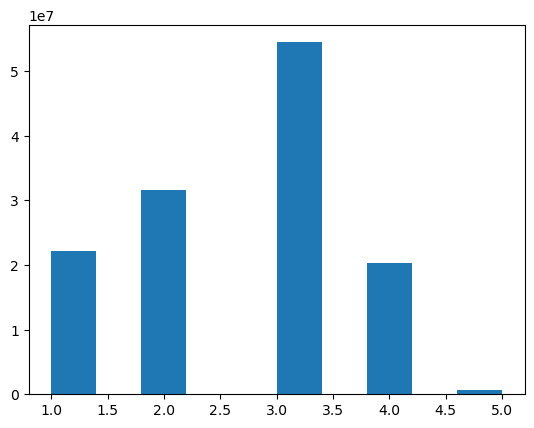

In [6]:
import matplotlib.pyplot as plt


data_flat = modis_stack_50_2[0].flatten()
plt.hist(data_flat)

In [7]:
years2=[2010,2015,2020]
modis_stack_senegal=[]
for i in years2: 
        with rasterio.open(f'senegal_data/official_data_cambiada_{i}.tif') as src:
                modis_stack_senegal.append(src.read())
                nodata = src.nodata  # Obtener el valor nodata si está definido
                if nodata is not None:
                        modis_stack_senegal[years2.index(i)] = np.where(modis_stack_senegal[years2.index(i)] == nodata, 0, modis_stack_senegal[years2.index(i)])

       # length()
        print(modis_stack_senegal[years2.index(i)].shape)

(1, 9672, 13386)
(1, 9672, 13386)


In [9]:
etiqueta=["Forest","Cropland","Grassland","Waterbody","Built-Up"]

In [10]:
cambio=[[0 for m in range(len(etiqueta))] for k in range(5)]

In [17]:
print(cambio)

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


In [15]:
print(years2)

[2010, 2015, 2020]


In [30]:
for a in years:
    print(a)
    if a in [2010,2011,2012,2013]:
        a2=2010
    if a in [2014,2015,2016,2017]:
        a2=2015
    if a in [2018,2019,2020]:
        a2=2020
    for i in range(9672):
        for j in range(13386):
            if modis_stack_senegal[years2.index(a2)][0,i,j]==1:
                cambio[0][modis_stack_50_2[years.index(a)][0,i,j]-1]+=1
            if modis_stack_senegal[years2.index(a2)][0,i,j]==2:
                cambio[1][modis_stack_50_2[years.index(a)][0,i,j]-1]+=1
            if modis_stack_senegal[years2.index(a2)][0,i,j]==3:
                cambio[2][modis_stack_50_2[years.index(a)][0,i,j]-1]+=1
            if modis_stack_senegal[years2.index(a2)][0,i,j]==4:
                cambio[3][modis_stack_50_2[years.index(a)][0,i,j]-1]+=1
            if modis_stack_senegal[years2.index(a2)][0,i,j]==5:
                cambio[4][modis_stack_50_2[years.index(a)][0,i,j]-1]+=1

2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


In [28]:
modis_stack_senegal

[array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]], dtype=int16),
 array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]], dtype=int16),
 array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]], dtype=int16)]

In [31]:
etiqueta_short=["Forest", "Crop", "Grass", "Water", "Built"]

In [32]:
etiqueta=["Forest","Cropland","Grassland","Waterbody","Built-Up"]

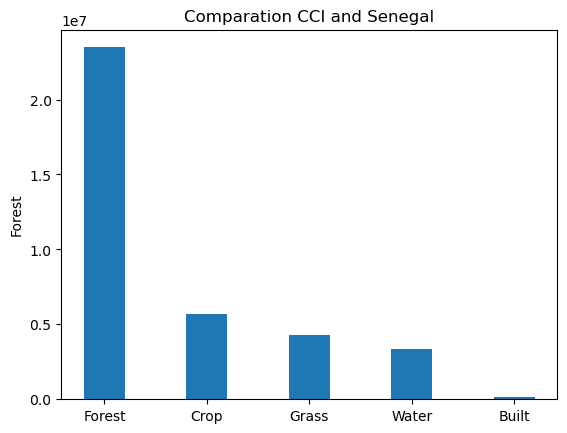

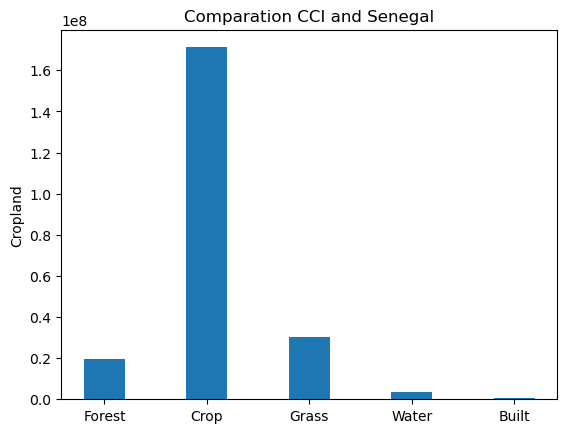

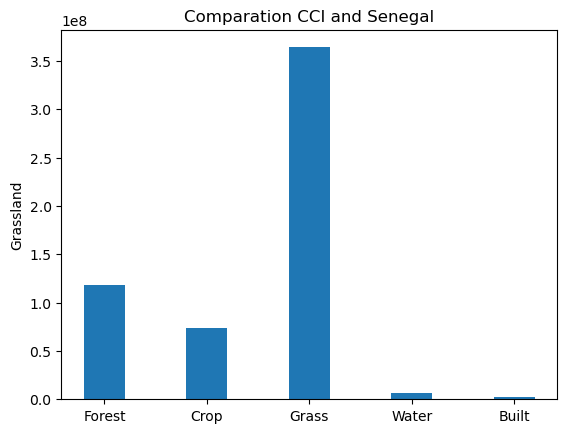

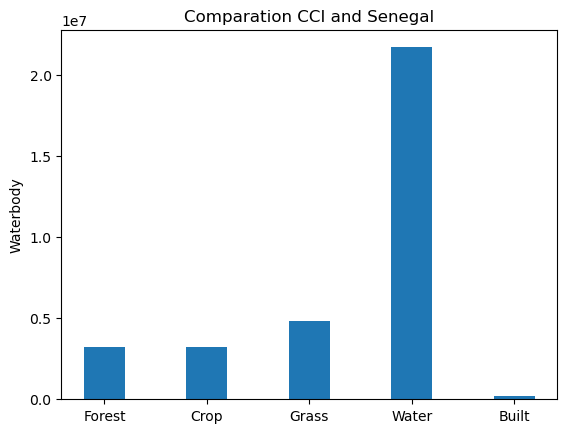

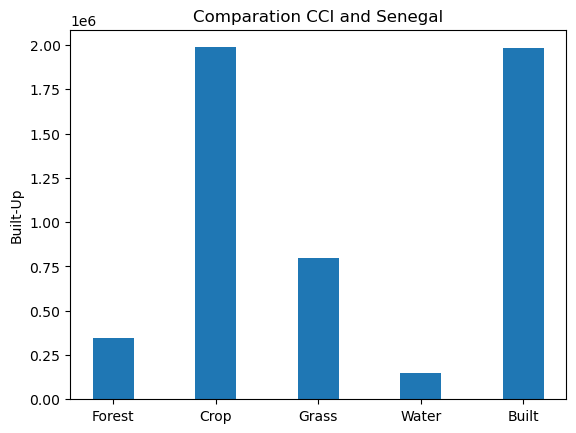

In [33]:
X_axis = np.arange(len(etiqueta)) 
for i in range(5):
        plt.bar(X_axis, cambio[i], width = 0.4, label="Have gone", tick_label=etiqueta_short)
        #plt.xlabel(etiqueta)
        plt.ylabel(etiqueta[i])
        plt.title("Comparation CCI and Senegal")

        plt.show()

In [15]:
difference=[]
change_map=[]

diff = np.abs(modis_stack_50_2[0] - modis_stack_senegal[0]).astype(np.int16)
difference.append(diff)
change_map.append(np.where(difference[0] > 0, 1, 0))
print(change_map[0].shape)

(1, 9672, 13386)


In [16]:
len(change_map)

1

In [17]:
diff = np.abs(modis_stack_50_2[1] - modis_stack_senegal[1]).astype(np.int16)
difference.append(diff)
change_map.append(np.where(difference[a] > 0, 1, 0))
print(change_map[1].shape)

(1, 9672, 13386)


In [18]:
modis_stack_oficial=[]
for i in years: 
        with rasterio.open(f'senegal_data/senegal_landcover_anat_32628_50m_2010.tiff') as src:
                modis_stack_oficial.append(src.read())
                nodata = src.nodata  # Obtener el valor nodata si está definido
       # length()
        print(modis_stack_oficial[years.index(i)].shape)

(1, 9672, 13386)
(1, 9672, 13386)


In [25]:
import rasterio
import numpy as np

# Supongamos que change_map[0] es el array que deseas guardar
change_map_data = change_map[0]

# Si tiene 3 dimensiones y la primera dimensión es 1, elimínala.
if change_map_data.shape[0] == 1:
    change_map_data = change_map_data.squeeze(0)

print(change_map_data.shape)  # Esto debería mostrar (9672, 13386)

# Define las características del archivo de salida
with rasterio.open(f'senegal_data/senegal_landcover_anat_32628_50m_2010.tiff') as src:
    # Copiamos la metadata del archivo original para usarla en el archivo de salida
    meta = src.meta.copy()
    meta.update(dtype=rasterio.float32, count=1, nodata=np.nan)

    # Guardar el array como .tiff
    with rasterio.open('output_change_map.tiff', 'w', **meta) as dst:
        dst.write(change_map_data.astype(rasterio.float32), 1)

print("Archivo guardado como 'output_change_map.tiff'")


(9672, 13386)
Archivo guardado como 'output_change_map.tiff'


In [20]:
print(change_map_data.shape)

(1, 9672, 13386)


In [26]:
from rasterio.plot import show, show_hist
from matplotlib import pyplot

In [29]:
import matplotlib.colors as mcolors

In [30]:
cmap = mcolors.ListedColormap(['green', 'red'])  # 'green' for 0, 'red' for 1
bounds = [0, 1, 2]  # Define bounds for the colormap
norm = mcolors.BoundaryNorm(bounds, cmap.N)

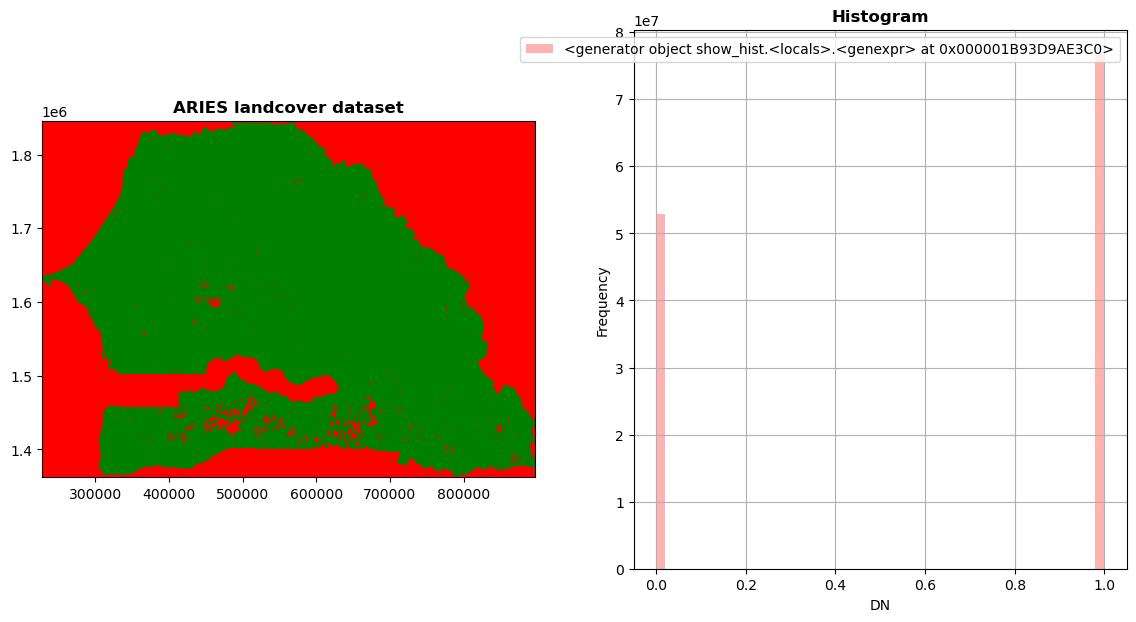

In [31]:
with rasterio.open("output_change_map.tiff") as src:
    fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))
    
    # Show the raster image with the custom colormap
    show(src, with_bounds=True, ax=axrgb, title='ARIES landcover dataset', cmap=cmap, norm=norm)
    
    # Show the histogram
    show_hist(src, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram", ax=axhist)
    
    plt.show()

In [35]:
import rasterio
import numpy as np

# Supongamos que change_map[0] es el array que deseas guardar
change_map_data = change_map[1]

# Si tiene 3 dimensiones y la primera dimensión es 1, elimínala.
print(change_map_data.shape[0])
if change_map_data.shape[0] == 1:
    print("A")
    change_map_data = change_map_data.squeeze(0)

print(change_map_data.shape)  # Esto debería mostrar (9672, 13386)

# Define las características del archivo de salida
with rasterio.open(f'senegal_data/senegal_landcover_anat_32628_50m_2010.tiff') as src:
    # Copiamos la metadata del archivo original para usarla en el archivo de salida
    meta = src.meta.copy()
    meta.update(dtype=rasterio.float32, count=1, nodata=np.nan)

    # Guardar el array como .tiff
    with rasterio.open('output_change_map.tiff', 'w', **meta) as dst:
        dst.write(change_map_data.astype(rasterio.float32), 1)

print("Archivo guardado como 'output_change_map.tiff'")


1
A
(9672, 13386)
Archivo guardado como 'output_change_map.tiff'


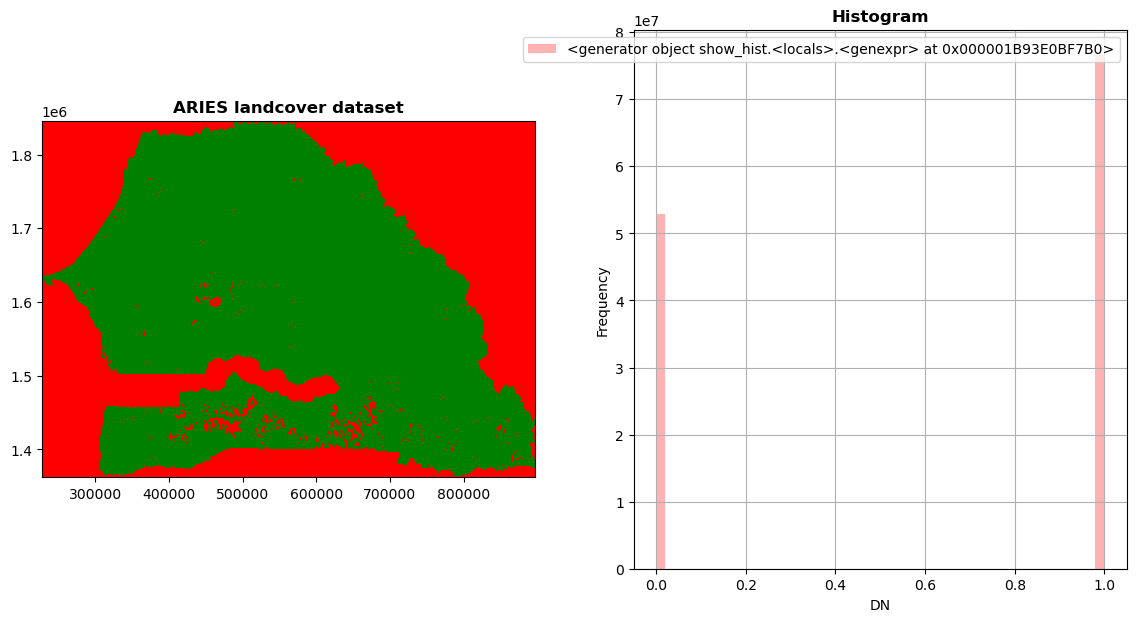

In [36]:
with rasterio.open("output_change_map.tiff") as src:
    fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))
    
    # Show the raster image with the custom colormap
    show(src, with_bounds=True, ax=axrgb, title='ARIES landcover dataset', cmap=cmap, norm=norm)
    
    # Show the histogram
    show_hist(src, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram", ax=axhist)
    
    plt.show()